## Tarea 4

<p>Jeisson Daniel Mariño Ustacara</p>
jdmarinou@unal.edu.co

In [1]:
import pandas as pd
!pip install pandasql
import pandasql as ps
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
import os
os.getcwd()
# No se cambia el directorio porque se abrió la terminal desde esta carpeta.

'/home/daniel/Documents/GitHub/data_science_2021_jdmarinou/tarea_4'

In [3]:
import zipfile

archive = zipfile.ZipFile('Datos.zip', 'r')
xlfile = archive.open('Curso/Municipios.xlsx')
Municipios = pd.read_excel(xlfile,dtype={'Dep': str, 'Depmun': str, 'Irural': float, 'Poblacion': float})
Municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  1118 non-null   object 
 1   Dep           1118 non-null   object 
 2   Municipio     1118 non-null   object 
 3   Depmun        1118 non-null   object 
 4   Superficie    1117 non-null   float64
 5   Poblacion     1118 non-null   float64
 6   Irural        1118 non-null   float64
 7   Region        1118 non-null   object 
dtypes: float64(3), object(5)
memory usage: 70.0+ KB


### Ejemplo 1
Cuales variables del conjunto de datos Municipios tienen valores perdidos o missings?

In [4]:
def missings(x):
    a = x.isna().sum()
    b = 100*x.isna().mean()
    c = pd.Series({"Missing":a, "%Missing:":b})
    return(c)

Municipios.apply(missings)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region
Missing,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
%Missing:,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00


### Ejemplo 2
Se hace "limpieza" en los nombres de los municipios, es decir,

* Se eliminan caracteres especiales
* Se eliminan espacios al inicio y al final
* Se reemplazan espacios múltiples por sencillos
* Se escriben en letras minúsculas excepto en la inicial de cada palabra

In [5]:
Municipios["Municipio2"] = (Municipios["Municipio"]
                            .str.lower()  # Se escriben en letras minísculas
                            .str.replace("[^a-záéíóúüñ ]","")  # Se eliminan caracteres especiales
                            .str.replace(" +"," ") # Se eliminan espacios extra
                            .str.strip() # Se quitan espacios del pricnipio y al final
                            .str.title() # Se deja la primera letra mayúscula
                           ) 

print(Municipios[["Municipio","Municipio2"]])
Municipios["Municipio"] = Municipios["Municipio2"]
Municipios = Municipios.drop(columns="Municipio2")

                     Municipio      Municipio2
0                   Mede&l'lín        Medellín
1                Abej!&orr*al        Abejorral
2                 A?br'&iaquí         Abriaquí
3                Alej#andr&'ía      Alejandría
4                   Am#a?&'*gá           Amagá
...                        ...             ...
1113            Y#*ava'ra?t!é         Yavaraté
1114     Puerto   Carr#eño'     Puerto Carreño
1115         La Prima&*'!ve#ra    La Primavera
1116          Santa   ?Rosalía   Santa Rosalía
1117              C#u'?mar!ibo        Cumaribo

[1118 rows x 2 columns]


### Ejemplo 3

Se hace "limpieza" en los nombres de los departamentos, es decir,

* Se eliminan caracteres especiales
* Se eliminan espacios al inicio y al final
* Se reemplazan espacios múltiples por sencillos
* Se escriben en letras minúsculas excepto en la inicial de cada palabra

In [6]:
Municipios["Departamento2"] = (Municipios["Departamento"]
                              .str.lower()
                              .str.replace("[^a-záéíóúüñ ]","")
                              .str.replace(" +"," ")
                              .str.strip()
                              .str.title())

print(Municipios[["Departamento","Departamento2"]] )
Municipios["Departamento"] = Municipios["Departamento2"]
Municipios.drop(columns="Departamento2", inplace =True)

      Departamento Departamento2
0       Ant%ioqUia     Antioquia
1       Ant%ioquia     Antioquia
2       Ant%ioquia     Antioquia
3      Ant%io>qUia     Antioquia
4        Antioquia     Antioquia
...            ...           ...
1113       Vaup>és        Vaupés
1114     Vi%ch>ada       Vichada
1115       Vichada       Vichada
1116     Vi%ch>ada       Vichada
1117    Vichada          Vichada

[1118 rows x 2 columns]


### Ejemplo 4

Se crea la variable _Tipo_ igual a "Capital" para la capital de cada departamento y "Otro" para el resto de los municipios.

In [7]:
def tipo(x):
    if x[2:5] == "001" and x!="25001": return("Capital")
    else: return("Otros")
Municipios["Tipo"] = Municipios["Depmun"].apply(tipo)
Municipios.query("Tipo=='Capital'")

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo
0,Antioquia,05,Medellín,05001,374.83,"2,483,545.00",5.00,Región Eje Cafetero,Capital
125,Atlántico,08,Barranquilla,08001,154.20,"1,243,056.00",3.00,Región Caribe,Capital
148,Bogotá D C,11,Bogotá D C,11001,"1,622.85","7,592,871.00",6.00,Región Centro Oriente,Capital
149,Bolívar,13,Cartagena,13001,597.68,"1,003,685.00",18.00,Región Caribe,Capital
194,Boyacá,15,Tunja,15001,119.69,"176,347.00",20.00,Región Centro Oriente,Capital
317,Caldas,17,Manizales,17001,441.00,"440,608.00",20.00,Región Eje Cafetero,Capital
344,Caquetá,18,Florencia,18001,"2,547.64","170,764.00",46.00,Región Centro Sur,Capital
360,Cauca,19,Popayán,19001,480.18,"321,991.00",27.00,Región Pacífico,Capital
401,Cesar,20,Valledupar,20001,"4,185.79","513,685.00",40.00,Región Caribe,Capital
426,Córdoba,23,Montería,23001,"3,136.59","498,858.00",39.00,Región Caribe,Capital


### Ejemplo 5
Se crea la variable _denspobl_ definida como el cociente entre Poblacion y Superficie. Se crea también la variable _Zona_ igual a "Urbano" cuando $Irural  <=40$  y "Rural" cuando $Irural  >40$ .

In [8]:
Municipios["denspobl"] = Municipios["Poblacion"]/Municipios["Superficie"]
def zona(x): 
    if x  > 40: return("Rural")
    if x <= 40: return("Urbano")
Municipios["Zona"] = Municipios["Irural"].apply(zona)

Municipios.head()

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo,denspobl,Zona
0,Antioquia,05,Medellín,05001,374.83,"2,483,545.00",5.00,Región Eje Cafetero,Capital,"6,625.78",Urbano
1,Antioquia,05,Abejorral,05002,507.13,"20,258.00",45.00,Región Eje Cafetero,Otros,39.95,Rural
2,Antioquia,05,Abriaquí,05004,296.96,"2,710.00",58.00,Región Eje Cafetero,Otros,9.13,Rural
3,Antioquia,05,Alejandría,05021,128.93,"4,669.00",48.00,Región Eje Cafetero,Otros,36.21,Rural
4,Antioquia,05,Amagá,05030,84.13,"30,777.00",28.00,Región Eje Cafetero,Otros,365.82,Urbano


### Ejemplo 6
Cálculo de algunas estadísticas descriptivas para las variables numéricas en el conjunto de datos Municipios.

In [9]:
Municipios.describe()

,Superficie,Poblacion,Irural,denspobl
count,"1,117.00","1,118.00","1,118.00","1,117.00"
mean,"1,020.43","44,095.63",46.78,165.34
std,"3,217.70","260,344.32",12.70,733.12
min,15.84,288.00,0.00,0.07
25%,132.76,"6,614.00",40.00,21.43
50%,287.04,"12,796.50",46.00,44.89
75%,704.10,"27,501.75",52.00,93.37
max,"65,597.21","7,592,871.00",100.00,"14,442.77"


### Ejemplo 7
Cálculo de algunas estadísticas descriptivas (personalizadas) para las variables numéricas en el conjunto de datos Municipios.

In [10]:
def summary(y):
    def numer(x):
        a = x.mean(); b = x.std() ; c = x.median() ; d = x.skew() ; e = x.kurt()
        f = pd.Series({"Mean":a, "St.dev":b, "Median":c , "Skewness": d, 
            "Kurtosis":e})
        return(f)
    numerics = y._get_numeric_data()
    if len(numerics.columns)>0: return(numerics.apply(numer))

summary(Municipios)

,Superficie,Poblacion,Irural,denspobl
Mean,"1,020.43","44,095.63",46.78,165.34
St.dev,"3,217.70","260,344.32",12.70,733.12
Median,287.04,"12,796.50",46.00,44.89
Skewness,10.85,23.38,0.70,12.33
Kurtosis,174.83,645.49,3.34,190.09


## <font color='red'>Tablas de frecuencia</font>

In [11]:
from mismacrospython import onewayfreq, twowayfreq

### Ejemplo 1
1. *¿Qué porcentaje del total representan los municipios del departamento de Norte de Santander?* 
    
    3.58%
2. *¿Cuantos municipios tiene el departamento del Valle del Cauca?* 
    
    42.
3. *¿Cuales son los cinco departamentos con mayor número de municipios?* 
    
    Antioquia, Boyacá, Cundinamarca, Santander, Nariño.
4. *¿Qué porcentaje del total representan los municipios de estos cinco departamentos?* 
    
    46.06%
5. *¿Qué porcentaje de los municipios son rurales?*

    73.52%

In [12]:
onewayfreq(rows="Departamento",data=Municipios,ord="freq")    

,Departamento,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,Antioquia,125,11.18,125,11.18
1,Boyacá,123,11.00,248,22.18
2,Cundinamarca,116,10.38,364,32.56
3,Santander,87,7.78,451,40.34
4,Nariño,64,5.72,515,46.06
5,Tolima,47,4.20,562,50.27
6,Bolívar,45,4.03,607,54.29
7,Valle Del Cauca,42,3.76,649,58.05
8,Cauca,41,3.67,690,61.72
9,Norte De Santander,40,3.58,730,65.30


In [13]:
onewayfreq(rows="Zona",data=Municipios,cum="False", ord = "freq")    

,Zona,Frequency,Percent
0,Rural,822,73.52
1,Urbano,296,26.48


### Ejemplo 2
1. ¿Qué porcentaje de la población habita en el departamento del Meta? 

    2.13%
2. ¿Cuantos habitantes tiene el departamento del Putumayo? 

    353.759
3. ¿Cuales son los cuatro departamentos con mayor número de habitantes? 

    Bogotá D.C., Antioquia, Valle del Cauca, Cundinamarca
4. ¿Qué porcentaje de la población habita en estos cuatro departamentos? 

    44.09%
5. ¿Qué porcentaje de la población habita en municipios rurales?
    
    71.29%
    

In [14]:
onewayfreq(rows="Departamento",weight="Poblacion", data=Municipios,ord="freq")    

,Departamento,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,Bogotá D C,"7,592,871.00",15.40,"7,592,871.00",15.40
1,Antioquia,"6,550,206.00",13.29,"14,143,077.00",28.69
2,Valle Del Cauca,"4,506,768.00",9.14,"18,649,845.00",37.83
3,Cundinamarca,"3,085,522.00",6.26,"21,735,367.00",44.09
4,Atlántico,"2,638,151.00",5.35,"24,373,518.00",49.44
5,Santander,"2,237,587.00",4.54,"26,611,105.00",53.98
6,Bolívar,"2,120,925.00",4.30,"28,732,030.00",58.28
7,Córdoba,"1,741,111.00",3.53,"30,473,141.00",61.81
8,Nariño,"1,628,981.00",3.30,"32,102,122.00",65.12
9,Norte De Santander,"1,565,362.00",3.18,"33,667,484.00",68.29


In [15]:
onewayfreq(rows="Zona",weight="Poblacion", data=Municipios,cum=False)    

,Zona,Frequency,Percent
0,Rural,"14,152,533.00",28.71
1,Urbano,"35,146,380.00",71.29


### Ejemplo 3

1. ¿Cuales son los cinco municipios más/menos poblados del departamento de Bolívar? 

    - Los más: Cartagena, Magangué, Turbaco, Arjona, El Carmen de Bolívar.
    - Los menos: Cantagallo, San Cristobal, El Peñón, Arenal, Regidor
    
2. ¿Qué porcentaje representan estos municipios del total de la población en el departamento? 

    - Los más: 65.72%
    - Los menos: 1.85%
3. ¿Qué porcentaje de la población del departamento habita en municipios rurales?

    30.83%

In [16]:
onewayfreq(rows="Municipio",weight="Poblacion", data = Municipios, 
           subset="Departamento=='Bolívar'", ord="freq" )

,Municipio,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,Cartagena,"1,003,685.00",47.32,"1,003,685.00",47.32
1,Magangué,"137,030.00",6.46,"1,140,715.00",53.78
2,Turbaco,"109,813.00",5.18,"1,250,528.00",58.96
3,Arjona,"71,837.00",3.39,"1,322,365.00",62.35
4,El Carmen De Bolívar,"71,428.00",3.37,"1,393,793.00",65.72
5,María La Baja,"47,389.00",2.23,"1,441,182.00",67.95
6,Mompós,"45,498.00",2.15,"1,486,680.00",70.10
7,San Juan Nepomuceno,"37,765.00",1.78,"1,524,445.00",71.88
8,Santa Rosa Del Sur,"33,701.00",1.59,"1,558,146.00",73.47
9,Mahates,"28,602.00",1.35,"1,586,748.00",74.81


In [17]:
onewayfreq(rows="Zona",weight="Poblacion", data = Municipios, 
           subset="Departamento=='Bolívar'", ord="freq" )

,Zona,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,Urbano,"1,467,132.00",69.17,"1,467,132.00",69.17
1,Rural,"653,793.00",30.83,"2,120,925.00",100.00


### Ejemplo 4

1. ¿Qué porcentaje de la superficie total de Colombia representa el departamento del Chocó? 
    
    4.24%
2. ¿Cual es la superficie del departamento de Córdoba? 

    890,843.49
3. ¿Cuales son los cinco departamentos con mayor/menor superficie? 

    - Los más: Amazonas, Vichada, Caquetá, Meta, Guainía.
    - Los menos: Risaralda, Atlántico, Quindío, Bogotá D.C., San Andrés.
4. ¿Qué porcentaje representan estos cinco departamentos de la superficie total de Colombia?

    - Los más: 40.05%
    - Los menos: 0.92%

In [18]:
onewayfreq(rows="Departamento",weight="Superficie", data = Municipios, ord="freq" )

,Departamento,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,Amazonas,"109,497.05",9.61,"109,497.05",9.61
1,Vichada,"100,063.37",8.78,"209,560.42",18.39
2,Caquetá,"90,103.01",7.91,"299,663.43",26.29
3,Meta,"85,527.29",7.50,"385,190.72",33.79
4,Guainía,"71,289.35",6.25,"456,480.08",40.05
5,Antioquia,"62,804.71",5.51,"519,284.79",45.56
6,Guaviare,"55,575.23",4.88,"574,860.02",50.43
7,Vaupés,"53,299.28",4.68,"628,159.30",55.11
8,Chocó,"48,353.22",4.24,"676,512.52",59.35
9,Casanare,"44,394.24",3.89,"720,906.76",63.25


### Ejemplo 5

1. ¿Qué porcentaje de los municipios del departamento de La Guajira son rurales? 
    
    El 100%
2. ¿Qué porcentaje de los municipios rurales están en el departamento de Vaupés?
    
    0.73%

In [19]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [20]:
dep_zona_twoway = twowayfreq(rows="Departamento", columns="Zona", data=Municipios, ord="freq",
          rowpercent=True, colpercent=True)
print_full(dep_zona_twoway)

Frequency
Row percent
Col percent
 
    Departamento  /  Zona  Rural  Urbano    Total
                                                 
0               Antioquia  86.00   39.00   125.00
1                          68.80   31.20   100.00
2                          10.46   13.18    11.18
3                  Boyacá  98.00   25.00   123.00
4                          79.67   20.33   100.00
5                          11.92    8.45    11.00
6            Cundinamarca  65.00   51.00   116.00
7                          56.03   43.97   100.00
8                           7.91   17.23    10.38
9               Santander  76.00   11.00    87.00
10                         87.36   12.64   100.00
11                          9.25    3.72     7.78
12                 Nariño  45.00   19.00    64.00
13                         70.31   29.69   100.00
14                          5.47    6.42     5.72
15                 Tolima  38.00    9.00    47.00
16                         80.85   19.15   100.00
17            

### Ejemplo 6

1. ¿Qué porcentaje de la población del departamento de Boyacá está en municipios rurales? 

    44.69%
2. ¿Qué porcentaje de la población total en municipios rurales está en el departamento de Antioquia?

    11.25%    

In [21]:
dep_zona_twoway_pob =   twowayfreq(rows="Departamento",columns="Zona",weight="Poblacion",data=Municipios,
           ord="freq", rowpercent=True, colpercent=True)
print_full(dep_zona_twoway_pob)

Frequency
Row percent
Col percent
 
    Departamento  /  Zona         Rural        Urbano         Total
                                                                   
0              Bogotá D C          0.00  7,592,871.00  7,592,871.00
1                                  0.00        100.00        100.00
2                                  0.00         21.60         15.40
3               Antioquia  1,591,938.00  4,958,268.00  6,550,206.00
4                                 24.30         75.70        100.00
5                                 11.25         14.11         13.29
6         Valle Del Cauca    550,147.00  3,956,621.00  4,506,768.00
7                                 12.21         87.79        100.00
8                                  3.89         11.26          9.14
9            Cundinamarca    529,770.00  2,555,752.00  3,085,522.00
10                                17.17         82.83        100.00
11                                 3.74          7.27          6.26
12          

### Ejemplo 7
1. ¿Qué porcentaje de la superficie del departamento de Nariño corresponde a municipios rurales? 
    
    80.88%
2. ¿Qué porcentaje de la superficie total en municipios rurales está en el departamento de Atlántico?
    
    0.09%

In [22]:
dep_zona_twoway_sup = twowayfreq(data=Municipios, rows="Departamento", columns="Zona", 
           weight="Superficie", ord="freq",rowpercent=True,colpercent=True)
print_full(dep_zona_twoway_sup)

Frequency
Row percent
Col percent
 
    Departamento  /  Zona        Rural    Urbano        Total
                                                             
0                Amazonas   109,497.05      0.00   109,497.05
1                               100.00      0.00       100.00
2                                10.29      0.00         9.61
3                 Vichada   100,063.37      0.00   100,063.37
4                               100.00      0.00       100.00
5                                 9.40      0.00         8.78
6                 Caquetá    90,103.01      0.00    90,103.01
7                               100.00      0.00       100.00
8                                 8.47      0.00         7.91
9                    Meta    83,893.10  1,634.19    85,527.29
10                               98.09      1.91       100.00
11                                7.88      2.16         7.50
12                Guainía    71,289.35      0.00    71,289.35
13                              10

## <font color='red'>Consulta, transformación y creación de conjuntos de datos</font>

### Ejemplo 1
data.frame con las variables Departamento, Dep, Depmun, Municipio, Superficie y Poblacion que incluye todos los municipios de los departamentos de Antioquia y Caldas con más de 20 mil habitantes y donde los mismos están ordenados con respecto a Dep y de mayor a menor con respecto a Poblacion.

In [23]:
E1 = ps.sqldf("""select Departamento, Dep, Depmun, Municipio, Superficie, Poblacion
from Municipios
where Departamento in ('Antioquia','Caldas')
and Poblacion > 20000
order by Dep, Poblacion DESC""")
E1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  66 non-null     object 
 1   Dep           66 non-null     object 
 2   Depmun        66 non-null     object 
 3   Municipio     66 non-null     object 
 4   Superficie    66 non-null     float64
 5   Poblacion     66 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.2+ KB


In [24]:
e1 = (Municipios
      .loc[:,["Departamento", "Dep", "Depmun", "Municipio", "Superficie", "Poblacion"]] 
      .query("Poblacion > 20000 and Dep in ('05','17')")
      .sort_values(by=["Dep","Poblacion"],ascending=[True,False])
      .reset_index(drop=True)
     )

E1.equals(e1)

True

### Ejemplo 2

data.frame con las variables Departamento, Dep, Depmun, Municipio, Superficie y Poblacion que incluye todos los municipios con superficies menores a 300  𝑘𝑚2  excepto los de Boyacá y Santander, y que están ordenados por Dep y de mayor a menor por Poblacion. Incluye una variable definida como "Baja" para los municipios con denspobl menor o igual a 30, "Alta" para los municipios con denspobl mayor a 85, y "Media" para los demás.

In [25]:
sql_ejemplo_2 = """ 
select Departamento, Dep, Depmun, Municipio, Superficie, Poblacion,
CASE when denspobl <= 30 then 'Baja'
     when denspobl > 85 then 'Alta'
     else 'Media'
END as denspoblC
from Municipios
where Superficie < 300
and Departamento not in ('Boyacá', 'Santander')
"""

E2 = ps.sqldf(sql_ejemplo_2)
E2

,Departamento,Dep,Depmun,Municipio,Superficie,Poblacion,denspoblC
0,Antioquia,05,05004,Abriaquí,296.96,"2,710.00",Baja
1,Antioquia,05,05021,Alejandría,128.93,"4,669.00",Media
2,Antioquia,05,05030,Amagá,84.13,"30,777.00",Alta
3,Antioquia,05,05036,Angelópolis,81.88,"5,790.00",Media
4,Antioquia,05,05044,Anza,255.92,"7,085.00",Baja
...,...,...,...,...,...,...,...
407,Casanare,85,85279,Recetor,181.23,"1,718.00",Baja
408,Putumayo,86,86219,Colón,64.27,"5,469.00",Alta
409,Putumayo,86,86749,Sibundoy,97.73,"15,217.00",Alta
410,San Andrés,88,88001,San Andrés,27.14,"56,358.00",Alta


### Ejemplo 3
¿Existen dos o más municipios con el mismo Depmun? no

In [26]:
sql_ejemplo_3 = """
select Depmun, count(*) as count
from Municipios
group by Depmun
having count(*) > 1
"""

ps.sqldf(sql_ejemplo_3)

,Depmun,count


### Ejemplo 4

De los departamentos con dos o más municipios cual es el menos homogeneo (de acuerdo al rango) con respecto a la superficie de los municipios que lo componen?

Vichada

In [27]:
sql_ejemplo_4 = """
select Dep, Departamento, (max(Superficie) - min(Superficie)) as rango
from Municipios
group by Dep, Departamento
having count(*) > 1 
order by rango desc
limit 1
"""

ps.sqldf(sql_ejemplo_4)

,Dep,Departamento,rango
0,99,Vichada,"61,905.34"


In [28]:
def rango(x): 
    return(x.max()- x.min())

(Municipios
 .groupby(["Dep","Departamento"])["Superficie"]
 .agg(["count",rango]).reset_index()
 .query("count > 1").drop(columns="count") 
 .sort_values(by=["rango"],ascending=False).reset_index(drop=True)
 .head(n=1)
)

,Dep,Departamento,rango
0,99,Vichada,"61,905.34"


### Ejemplo 5
De los departamentos con dos o más municipios cual es el más homogeneo (de acuerdo al coeficiente de variación) con respecto a la superficie de los municipios que lo componen?

In [29]:
sql_ejemplo_5 = """
select Dep, Departamento, ((sum(Superficie*Superficie) - count(*)*avg(Superficie)*avg(Superficie))/(count(*) -1 ))/(avg(Superficie)*avg(Superficie))  as coef_variacion 
from Municipios
group by Dep, Departamento
having count(*) > 1 
order by coef_variacion desc
limit 1
"""

ps.sqldf(sql_ejemplo_5)

,Dep,Departamento,coef_variacion
0,18,Caquetá,3.76


### Ejemplo 6

data.frame con todos los departamentos, ordenados de mayor a menor con respecto a su población, que incluye la siguiente información: número de municipios, superficie, población, índice de ruralidad promedio ponderado por población, densidad poblacional, y una variable igual a "Grande" para los departamentos con población mayor a  1.5  millones de habitantes, "Pequeño" para departamentos con población menor a  300  mil habitantes, y "Mediano" para el resto.

In [30]:
sql_ejemplo_6 = """ 
select Dep, Departamento, count(*) as n_municipios, sum(Superficie) as sup_depto, 
       sum(Poblacion) as totpob,  sum(Irural*Poblacion)/sum(Poblacion) as IRural_pob, 
       sum(Poblacion)/sum(Superficie) as denspob, 
       case
           when sum(Poblacion) > 15000000 then 'Grande'
           when sum(Poblacion) <= 300000 then "Pequeño"
           else "Mediano"
       end as totpobC
from Municipios 
group by Dep, Departamento
order by totpob desc;
"""

E6 = ps.sqldf(sql_ejemplo_6)
E6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dep           33 non-null     object 
 1   Departamento  33 non-null     object 
 2   n_municipios  33 non-null     int64  
 3   sup_depto     33 non-null     float64
 4   totpob        33 non-null     float64
 5   IRural_pob    33 non-null     float64
 6   denspob       33 non-null     float64
 7   totpobC       33 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 2.2+ KB


### Ejemplo 7

Cual es la región con la mayor superficie?

In [31]:
sql_ejemplo_7 = """
select Region, sum(Superficie) as reg_superficie
from Municipios
group by Region
order by reg_superficie desc
limit 1
"""

ps.sqldf(sql_ejemplo_7)

,Region,reg_superficie
0,Región Llano,"434,000.02"


### Ejemplo 8

data.frame con todos los departamentos, ordenados de mayor a menor con respecto a su población, que incluye la siguiente información: número de municipios, superficie, población, densidad poblacional, todo referente a los municipios con índice de ruralidad mayor a 60.

In [32]:
sql_ejemplo_8 = """
select Dep, Departamento, count(*) as n_municipios, sum(Superficie) as tot_superficie,
       sum(Poblacion) as tot_poblacion, sum(Poblacion)/sum(Superficie) as dens_pob
from Municipios
where Irural > 60
group by Dep, Departamento
order by tot_poblacion desc;
"""

ps.sqldf(sql_ejemplo_8)

,Dep,Departamento,n_municipios,tot_superficie,tot_poblacion,dens_pob
0,50,Meta,12,"74,457.93","207,857.00",2.79
1,27,Chocó,8,"26,448.17","153,096.00",5.79
2,85,Casanare,12,"37,493.09","146,548.00",3.91
3,18,Caquetá,6,"78,392.49","133,736.00",1.71
4,99,Vichada,4,"100,063.37","110,599.00",1.11
5,95,Guaviare,4,"55,575.23","84,716.00",1.52
6,91,Amazonas,11,"109,497.05","77,753.00",0.71
7,86,Putumayo,2,"15,483.47","65,053.00",4.20
8,81,Arauca,3,"12,912.74","55,471.00",4.30
9,94,Guainía,9,"71,289.35","49,473.00",0.69


### Ejemplo 9

Cual es la región con el mayor número de departamentos?

In [33]:
sql_ejemplo_9 = """ 
select Region, count(distinct Dep) as n_deptos
from Municipios
group by Region
order by n_deptos desc
limit 1;
"""

ps.sqldf(sql_ejemplo_9)

,Region,n_deptos
0,Región Caribe,8


### Ejemplo 10

data.frame con todos los departamentos con al menos 650 mil habitantes y al menos 10 mil km²  de superficie, ordenados de mayor a menor con relación a su densidad poblacional, y que incluye la siguiente información: número de municipios, superficie, población y densidad poblacional.

In [34]:
sql_ejemplo_10 = """
select Dep, Departamento, count(*) as n_municipios, sum(Superficie) as tot_sup,
       sum(Poblacion) as tot_poblacion, sum(Poblacion)/sum(Superficie) as dens_pob
from Municipios
group by Dep, Departamento
having tot_sup >= 10000
and tot_poblacion >=650000
order by dens_pob desc;
"""

ps.sqldf(sql_ejemplo_10)

,Dep,Departamento,n_municipios,tot_sup,tot_poblacion,dens_pob
0,76,Valle Del Cauca,42,"20,665.54","4,506,768.00",218.08
1,25,Cundinamarca,116,"22,370.49","3,085,522.00",137.93
2,05,Antioquia,125,"62,804.71","6,550,206.00",104.29
3,70,Sucre,26,"10,591.85","928,984.00",87.71
4,13,Bolívar,45,"26,302.81","2,120,925.00",80.63
5,68,Santander,87,"30,561.50","2,237,587.00",73.22
6,54,Norte De Santander,40,"21,856.75","1,565,362.00",71.62
7,23,Córdoba,28,"24,454.52","1,741,111.00",71.20
8,41,Huila,37,"18,141.66","1,111,844.00",61.29
9,47,Magdalena,30,"23,135.94","1,388,832.00",60.03


In [35]:
e10 = (Municipios
       .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion"]]
       .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum")).reset_index()
       .eval("denspob = totpob/totsup")
       .query("totpob >= 650000 and totsup >= 10000")
       .sort_values(by=["denspob"],ascending=False).reset_index(drop=True))
e10

,Dep,Departamento,nmunicipios,totpob,totsup,denspob
0,76,Valle Del Cauca,42,"4,506,768.00","20,665.54",218.08
1,25,Cundinamarca,116,"3,085,522.00","22,370.49",137.93
2,05,Antioquia,125,"6,550,206.00","62,804.71",104.29
3,70,Sucre,26,"928,984.00","10,591.85",87.71
4,13,Bolívar,45,"2,120,925.00","26,302.81",80.63
5,68,Santander,87,"2,237,587.00","30,561.50",73.22
6,54,Norte De Santander,40,"1,565,362.00","21,856.75",71.62
7,23,Córdoba,28,"1,741,111.00","24,454.52",71.20
8,41,Huila,37,"1,111,844.00","18,141.66",61.29
9,47,Magdalena,30,"1,388,832.00","23,135.94",60.03


### Ejemplo 11

data.frame con todos los departamentos con al menos 650 mil habitantes y al menos 10 mil  𝑘𝑚2  de superficie, ordenados de mayor a menor con relación a su densidad poblacional, y que incluye la siguiente información: número de municipios, superficie, población, y densidad poblacional, todo referente a municipios con índice de ruralidad mayor a 40.

In [36]:
sql_ejemplo_11 = """
select Dep, Departamento, count(*) as n_municipios, sum(Superficie) as tot_sup,
       sum(Poblacion) as tot_poblacion, sum(Poblacion)/sum(Superficie) as dens_pob
from Municipios
where IRural > 40
group by Dep, Departamento
having tot_sup >= 10000
and tot_poblacion >=650000
order by dens_pob desc;
"""

ps.sqldf(sql_ejemplo_11)

,Dep,Departamento,n_municipios,tot_sup,tot_poblacion,dens_pob
0,44,La Guajira,15,"20,621.96","927,506.00",44.98
1,23,Córdoba,18,"18,777.92","813,722.00",43.33
2,20,Cesar,23,"18,303.55","734,244.00",40.11
3,52,Nariño,45,"25,475.11","757,725.00",29.74
4,13,Bolívar,34,"22,520.49","653,793.00",29.03
5,05,Antioquia,86,"56,151.07","1,591,938.00",28.35
6,19,Cauca,30,"28,285.49","755,947.00",26.73


In [37]:
e11 = (Municipios
       .query("Irural > 40")
       .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion"]]
       .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum")).reset_index()
       .eval("denspob = totpob/totsup")
       .query("totpob >= 650000 and totsup >= 10000")
       .sort_values(by=["denspob"],ascending=False).reset_index(drop=True)
      ) 
e11

,Dep,Departamento,nmunicipios,totpob,totsup,denspob
0,44,La Guajira,15,"927,506.00","20,621.96",44.98
1,23,Córdoba,18,"813,722.00","18,777.92",43.33
2,20,Cesar,23,"734,244.00","18,303.55",40.11
3,52,Nariño,45,"757,725.00","25,475.11",29.74
4,13,Bolívar,34,"653,793.00","22,520.49",29.03
5,05,Antioquia,86,"1,591,938.00","56,151.07",28.35
6,19,Cauca,30,"755,947.00","28,285.49",26.73


### Ejemplo 12

Existen dos o más municipios con el mismo nombre? Cuantos? Cuales? En qué departamentos están ubicados?

In [38]:
sql_repetidos = """
select Municipio, count(*) as nro_veces
from Municipios
group by Municipio
having nro_veces > 1 
order by nro_veces desc
"""

repetidos = ps.sqldf(sql_repetidos)

sql_ejemplo_12 = """
select Municipio, Departamento, Dep, Depmun
from Municipios 
where Municipio in (select Municipio from repetidos)
order by Municipio, Departamento
"""

ps.sqldf(sql_ejemplo_12)


,Municipio,Departamento,Dep,Depmun
0,Albania,Caquetá,18,18029
1,Albania,La Guajira,44,44035
2,Albania,Santander,68,68020
3,Albán,Cundinamarca,25,25019
4,Albán,Nariño,52,52019
...,...,...,...,...
152,Venecia,Cundinamarca,25,25506
153,Villanueva,Bolívar,13,13873
154,Villanueva,Casanare,85,85440
155,Villanueva,La Guajira,44,44874


In [39]:
Repetidos = (Municipios
             .groupby("Municipio")
             .agg(reps=("Municipio","count")).reset_index()
             .query("reps > 1")
             .sort_values(by=["reps"],ascending=False) 
            )
reps = Repetidos["Municipio"]

e12 = (Municipios
       .loc[:,["Municipio", "Departamento", "Dep", "Depmun"]] 
       .query("Municipio in @reps")
       .sort_values(by=["Municipio", "Departamento"],ascending=[True,True]).reset_index(drop=True)
      )

e12

,Municipio,Departamento,Dep,Depmun
0,Albania,Caquetá,18,18029
1,Albania,La Guajira,44,44035
2,Albania,Santander,68,68020
3,Albán,Cundinamarca,25,25019
4,Albán,Nariño,52,52019
...,...,...,...,...
152,Venecia,Cundinamarca,25,25506
153,Villanueva,Bolívar,13,13873
154,Villanueva,Casanare,85,85440
155,Villanueva,La Guajira,44,44874


### Ejemplo 13

Existen dos o más municipios con el mismo nombre que hacen parte de la misma región? Cuantos? Cuales?

In [40]:
Municipios["regmun"] = Municipios["Region"] + Municipios["Municipio"]

sql_repetidos = """
select regmun, count(*) as nro_veces
from Municipios
group by Region, Municipio
having nro_veces > 1 
order by nro_veces desc
"""

repetidos = ps.sqldf(sql_repetidos)

sql_ejemplo_13 = """
select Municipio, Region, Departamento, Dep, Depmun
from Municipios 
where regmun in (select regmun from repetidos)
order by Municipio asc, Region asc

"""

ps.sqldf(sql_ejemplo_13)



,Municipio,Region,Departamento,Dep,Depmun
0,Argelia,Región Pacífico,Cauca,19,19050
1,Argelia,Región Pacífico,Valle Del Cauca,76,76054
2,Armenia,Región Eje Cafetero,Antioquia,05,05059
3,Armenia,Región Eje Cafetero,Quindío,63,63001
4,Bolívar,Región Pacífico,Cauca,19,19100
5,Bolívar,Región Pacífico,Valle Del Cauca,76,76100
6,Buenavista,Región Caribe,Córdoba,23,23079
7,Buenavista,Región Caribe,Sucre,70,70110
8,Cabrera,Región Centro Oriente,Cundinamarca,25,25120
9,Cabrera,Región Centro Oriente,Santander,68,68121


In [41]:
Repetidos = (Municipios
             .groupby("regmun")
             .agg(reps=("regmun","count")).reset_index()
             .query("reps > 1")
             .sort_values(by=["reps"],ascending=False) 
            )
reps = Repetidos["regmun"]

e13 = (Municipios
       .query("regmun in @reps")
       .loc[:,["Municipio", "Region", "Departamento", "Dep", "Depmun"]] 
       .sort_values(by=["Municipio", "Region"],ascending=[True,True])
       .reset_index(drop=True)
      )

#Municipios = Municipios.drop(columns="regmun")
e13

,Municipio,Region,Departamento,Dep,Depmun
0,Argelia,Región Pacífico,Cauca,19,19050
1,Argelia,Región Pacífico,Valle Del Cauca,76,76054
2,Armenia,Región Eje Cafetero,Antioquia,05,05059
3,Armenia,Región Eje Cafetero,Quindío,63,63001
4,Bolívar,Región Pacífico,Cauca,19,19100
5,Bolívar,Región Pacífico,Valle Del Cauca,76,76100
6,Buenavista,Región Caribe,Córdoba,23,23079
7,Buenavista,Región Caribe,Sucre,70,70110
8,Cabrera,Región Centro Oriente,Cundinamarca,25,25120
9,Cabrera,Región Centro Oriente,Santander,68,68121


### Ejemplo 14

data.frame con los municipios cuyos nombres inician con "A" o terminan con "o".

In [42]:
sql_ejemplo_14 = """
select *
from Municipios
where 
    Municipio like 'A%'
    or Municipio like '%o'
order by Depmun
"""

ps.sqldf(sql_ejemplo_14)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo,denspobl,Zona,regmun
0,Antioquia,05,Abejorral,05002,507.13,"20,258.00",45.00,Región Eje Cafetero,Otros,39.95,Rural,Región Eje Cafetero Abejorral
1,Antioquia,05,Abriaquí,05004,296.96,"2,710.00",58.00,Región Eje Cafetero,Otros,9.13,Rural,Región Eje Cafetero Abriaquí
2,Antioquia,05,Alejandría,05021,128.93,"4,669.00",48.00,Región Eje Cafetero,Otros,36.21,Rural,Región Eje Cafetero Alejandría
3,Antioquia,05,Amagá,05030,84.13,"30,777.00",28.00,Región Eje Cafetero,Otros,365.82,Urbano,Región Eje Cafetero Amagá
4,Antioquia,05,Amalfi,05031,"1,209.13","26,552.00",54.00,Región Eje Cafetero,Otros,21.96,Rural,Región Eje Cafetero Amalfi
...,...,...,...,...,...,...,...,...,...,...,...,...
284,Amazonas,91,El Encanto,91263,"10,897.55","2,077.00",89.00,Región Centro Sur,Otros,0.19,Rural,Región Centro SurEl Encanto
285,Amazonas,91,Puerto Nariño,91540,"1,509.20","9,997.00",72.00,Región Centro Sur,Otros,6.62,Rural,Región Centro SurPuerto Nariño
286,Guaviare,95,El Retorno,95025,"12,442.23","13,684.00",77.00,Región Llano,Otros,1.10,Rural,Región LlanoEl Retorno
287,Vichada,99,Puerto Carreño,99001,"12,204.95","20,474.00",81.00,Región Llano,Capital,1.68,Rural,Región LlanoPuerto Carreño


In [43]:
e14 = (Municipios
       .query("Municipio.str.contains('^A|o$')",engine="python")
       .loc[:,["Dep", "Departamento", "Municipio", "Depmun"]] 
       .sort_values(by=["Depmun"],ascending=True)
       .reset_index(drop=True)
      )
e14

,Dep,Departamento,Municipio,Depmun
0,05,Antioquia,Abejorral,05002
1,05,Antioquia,Abriaquí,05004
2,05,Antioquia,Alejandría,05021
3,05,Antioquia,Amagá,05030
4,05,Antioquia,Amalfi,05031
...,...,...,...,...
284,91,Amazonas,El Encanto,91263
285,91,Amazonas,Puerto Nariño,91540
286,95,Guaviare,El Retorno,95025
287,99,Vichada,Puerto Carreño,99001


### Ejemplo 15
data.frame con los municipios cuyos nombres inician con "A" y terminan con "o".


In [44]:
sql_ejemplo_15 = """
select *
from Municipios
where 
    Municipio like 'A%o'
order by Depmun
"""

ps.sqldf(sql_ejemplo_15)


,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo,denspobl,Zona,regmun
0,Bolívar,13,Altos Del Rosario,13030,303.75,"11,309.00",49.00,Región Caribe,Otros,37.23,Rural,Región CaribeAltos Del Rosario
1,Bolívar,13,Arroyohondo,13062,163.81,"8,504.00",44.00,Región Caribe,Otros,51.91,Rural,Región CaribeArroyohondo
2,Boyacá,15,Arcabuco,15051,137.90,"5,911.00",48.00,Región Centro Oriente,Otros,42.86,Rural,Región Centro OrienteArcabuco
3,Cundinamarca,25,Apulo,25599,121.99,"8,457.00",41.00,Región Centro Oriente,Otros,69.33,Rural,Región Centro OrienteApulo
4,Chocó,27,Alto Baudo,27025,"2,050.42","27,982.00",56.00,Región Pacífico,Otros,13.65,Rural,Región PacíficoAlto Baudo
5,Chocó,27,Atrato,27050,421.57,"6,145.00",53.00,Región Pacífico,Otros,14.58,Rural,Región PacíficoAtrato
6,Huila,41,Acevedo,41006,540.52,"25,046.00",47.00,Región Centro Sur,Otros,46.34,Rural,Región Centro SurAcevedo
7,Huila,41,Agrado,41013,273.73,"8,866.00",50.00,Región Centro Sur,Otros,32.39,Rural,Región Centro SurAgrado
8,Magdalena,47,Algarrobo,47030,406.39,"16,194.00",49.00,Región Caribe,Otros,39.85,Rural,Región CaribeAlgarrobo
9,Norte De Santander,54,Abrego,54003,"1,382.45","33,003.00",52.00,Región Centro Oriente,Otros,23.87,Rural,Región Centro OrienteAbrego


### Ejemplo 16
data.frame con los municipios cuyo nombre tiene a la letra "e" en las posiciones 2 y 4.

In [45]:
ps.sqldf("""select   Dep, Departamento, Municipio, Depmun
                  from     Municipios
                  where    Municipio like '_e_e%'
                  order by Depmun""")

,Dep,Departamento,Municipio,Depmun
0,05,Antioquia,Medellín,05001
1,05,Antioquia,Remedios,05604
2,05,Antioquia,Venecia,05861
3,08,Atlántico,Repelón,08606
4,15,Boyacá,Jenesano,15367
5,20,Cesar,Becerril,20045
6,23,Córdoba,Cereté,23162
7,25,Cundinamarca,Venecia,25506
8,47,Magdalena,Tenerife,47798
9,50,Meta,Mesetas,50330


In [46]:
e16 = (Municipios
       .query("Municipio.str.contains('^.{1}e.{1}e.*')",engine="python")
       .loc[:,["Dep", "Departamento", "Municipio", "Depmun"]] 
       .sort_values(by=["Depmun"],ascending=True)
       .reset_index(drop=True)
      )

e16

,Dep,Departamento,Municipio,Depmun
0,05,Antioquia,Medellín,05001
1,05,Antioquia,Remedios,05604
2,05,Antioquia,Venecia,05861
3,08,Atlántico,Repelón,08606
4,15,Boyacá,Jenesano,15367
5,20,Cesar,Becerril,20045
6,23,Córdoba,Cereté,23162
7,25,Cundinamarca,Venecia,25506
8,47,Magdalena,Tenerife,47798
9,50,Meta,Mesetas,50330


### Ejemplo 17
data.frame con los municipios cuyos nombres constan de más de una palabra.

In [47]:
ps.sqldf("""select   Dep, Departamento, Municipio, Depmun
                  from     Municipios
                  where    Municipio like '% %'
                  order by Depmun""")

,Dep,Departamento,Municipio,Depmun
0,05,Antioquia,Santafé De Antioquia,05042
1,05,Antioquia,Ciudad Bolívar,05101
2,05,Antioquia,El Carmen De Viboral,05148
3,05,Antioquia,Don Matías,05237
4,05,Antioquia,El Bagre,05250
...,...,...,...,...
302,95,Guaviare,San José Del Guaviare,95001
303,95,Guaviare,El Retorno,95025
304,99,Vichada,Puerto Carreño,99001
305,99,Vichada,La Primavera,99524


In [48]:
A = pd.DataFrame({"id":[1,2,2,3],"cod":[23,65,60,87],"name":["Leia","Luke","Yoda","Hank"]})
B = pd.DataFrame({"id":[2,3,4],"cod":[65,87,29],"age":[23,20,25]})
A
B

ps.sqldf("""select * 
            from     A inner join B on (A.id=B.id and A.cod=B.cod)""")

ps.sqldf("""select * 
            from     B inner join A on (B.id=A.id and B.cod=A.cod)""")

ps.sqldf("""select * 
            from     A left join B on (A.id=B.id and A.cod=B.cod)""")

ps.sqldf("""select * 
            from     B left join A on (B.id=A.id and B.cod=A.cod)""")

,id,cod,age,id,cod,name
0,2,65,23,2.00,65.00,Luke
1,3,87,20,3.00,87.00,Hank
2,4,29,25,nan,nan,None


### Ejemplo 18
Cuantos y cuales municipios tienen al menos una estación de monitoreo climático?

In [49]:
xlfile = archive.open('Curso/Estaciones.xlsx')
Estaciones = pd.read_excel(xlfile,
                           dtype = {'CODIGO': str, 'Depmun': str})
Estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CODIGO    1968 non-null   object 
 1   CAT       1968 non-null   object 
 2   NOMBRE    1968 non-null   object 
 3   ELEV      1968 non-null   int64  
 4   LONGITUD  1968 non-null   object 
 5   LATITUD   1968 non-null   object 
 6   PRECIP    1968 non-null   float64
 7   NDLL      1849 non-null   float64
 8   Depmun    1968 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 138.5+ KB


In [50]:
ps.sqldf("""select distinct Depmun
                  from   Estaciones""")

,Depmun
0,05209
1,05237
2,05250
3,05148
4,05697
...,...
801,97001
802,99773
803,99524
804,99001


### Ejemplo 19
data.frame con todos los municipios del país, que incluye una variable que informa el número de estaciones de monitoreo climático con que cuenta cada municipio.

In [51]:
emon = ps.sqldf(""" select Depmun, count(*) as nem
                from Estaciones
                group by Depmun""")

sql_ejemplo_19 = """
select Municipios.*, 
case 
    when nem is null then 0.0
    else nem 
end as nest
from Municipios left join emon
    on Municipios.Depmun = Emon.Depmun
"""

ps.sqldf(sql_ejemplo_19)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo,denspobl,Zona,regmun,nest
0,Antioquia,05,Medellín,05001,374.83,"2,483,545.00",5.00,Región Eje Cafetero,Capital,"6,625.78",Urbano,Región Eje Cafetero Medellín,10.00
1,Antioquia,05,Abejorral,05002,507.13,"20,258.00",45.00,Región Eje Cafetero,Otros,39.95,Rural,Región Eje Cafetero Abejorral,2.00
2,Antioquia,05,Abriaquí,05004,296.96,"2,710.00",58.00,Región Eje Cafetero,Otros,9.13,Rural,Región Eje Cafetero Abriaquí,1.00
3,Antioquia,05,Alejandría,05021,128.93,"4,669.00",48.00,Región Eje Cafetero,Otros,36.21,Rural,Región Eje Cafetero Alejandría,0.00
4,Antioquia,05,Amagá,05030,84.13,"30,777.00",28.00,Región Eje Cafetero,Otros,365.82,Urbano,Región Eje Cafetero Amagá,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Vaupés,97,Yavaraté,97889,"4,660.41","1,067.00",92.00,Región Llano,Otros,0.23,Rural,Región LlanoYavaraté,0.00
1114,Vichada,99,Puerto Carreño,99001,"12,204.95","20,474.00",81.00,Región Llano,Capital,1.68,Rural,Región LlanoPuerto Carreño,6.00
1115,Vichada,99,La Primavera,99524,"18,569.34","9,799.00",85.00,Región Llano,Otros,0.53,Rural,Región LlanoLa Primavera,2.00
1116,Vichada,99,Santa Rosalía,99624,"3,691.87","4,130.00",81.00,Región Llano,Otros,1.12,Rural,Región LlanoSanta Rosalía,1.00


### Ejemplo 20
Existen municipios que no tienen ninguna estación de monitoreo climático? Cuantos? Cuales?

In [52]:
sql_ejemplo_20 = """
select Municipios.*
from Municipios left join emon
    on Municipios.Depmun = emon.Depmun
where nem is NULL
order by Depmun
"""
ps.sqldf(sql_ejemplo_20)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo,denspobl,Zona,regmun
0,Antioquia,05,Alejandría,05021,128.93,"4,669.00",48.00,Región Eje Cafetero,Otros,36.21,Rural,Región Eje Cafetero Alejandría
1,Antioquia,05,Amagá,05030,84.13,"30,777.00",28.00,Región Eje Cafetero,Otros,365.82,Urbano,Región Eje Cafetero Amagá
2,Antioquia,05,Angelópolis,05036,81.88,"5,790.00",37.00,Región Eje Cafetero,Otros,70.72,Urbano,Región Eje Cafetero Angelópolis
3,Antioquia,05,Argelia,05055,245.34,"7,577.00",46.00,Región Eje Cafetero,Otros,30.88,Rural,Región Eje Cafetero Argelia
4,Antioquia,05,Briceño,05107,376.35,"8,065.00",52.00,Región Eje Cafetero,Otros,21.43,Rural,Región Eje Cafetero Briceño
...,...,...,...,...,...,...,...,...,...,...,...,...
307,Vaupés,97,Caruru,97161,"6,368.49","3,056.00",85.00,Región Llano,Otros,0.48,Rural,Región LlanoCaruru
308,Vaupés,97,Pacoa,97511,"13,993.25","4,229.00",91.00,Región Llano,Otros,0.30,Rural,Región LlanoPacoa
309,Vaupés,97,Taraira,97666,"6,510.25","2,318.00",97.00,Región Llano,Otros,0.36,Rural,Región LlanoTaraira
310,Vaupés,97,Papunaua,97777,"5,551.15",749.00,95.00,Región Llano,Otros,0.13,Rural,Región LlanoPapunaua


### Ejemplo 21
Copia de Estaciones que solo considera estaciones de monitoreo localizadas como máximo a 2000 metros de altura sobre el nivel del mar, y que incluye los nombres del municipio y del departamento donde están ubicadas las estaciones.

In [53]:
sql_ejemplo_21 = """
select Estaciones.*, Municipios.Departamento, Municipios.Municipio
from Estaciones left join Municipios
    on Estaciones.Depmun = Municipios.Depmun
where ELEV <= 2000
order by Depmun, codigo
"""

ps.sqldf(sql_ejemplo_21)

,CODIGO,CAT,NOMBRE,ELEV,LONGITUD,LATITUD,PRECIP,NDLL,Depmun,Departamento,Municipio
0,27010380,PG,San Antonio de Pra,2000,"75ø40'0""W","6ø11'0""N","2,116.05",198.54,05001,Antioquia,Medellín
1,27010450,PG,Villahermosa Plant,1690,"75ø33'0""W","6ø16'0""N","1,608.92",178.40,05001,Antioquia,Medellín
2,27010460,PG,San Cristobal,1890,"75ø38'0""W","6ø17'0""N","1,768.06",213.07,05001,Antioquia,Medellín
3,27010470,PG,Medellin Miguel Ag,1549,"75ø34'0""W","6ø15'0""N","1,470.31",201.56,05001,Antioquia,Medellín
4,27015070,SP,Apto Olaya Herrera,1490,"75ø35'20,3""W","6ø13'14,2""N","1,685.33",224.60,05001,Antioquia,Medellín
...,...,...,...,...,...,...,...,...,...,...,...
1532,32200010,PM,Cejal,94,"68ø19'29,3""W","3ø59'18,5""N","3,094.90",155.04,99773,Vichada,Cumaribo
1533,33060010,PM,Sta Rita,87,"68ø21'49,8""W","4ø51'57,2""N","3,029.80",157.32,99773,Vichada,Cumaribo
1534,34015010,SP,Gaviotas Las,171,"70ø55'48,4""W","4ø33'14,2""N","2,759.80",200.50,99773,Vichada,Cumaribo
1535,34035010,CO,Tuparro Bocas Tomo,250,"67ø51'29,7""W","5ø21'11,3""N","2,587.16",167.90,99773,Vichada,Cumaribo


## <font color='red'>Gráficos</font>

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
xlfile = archive.open('Curso/Advertising.xlsx')
Advertising = pd.read_excel(xlfile)
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


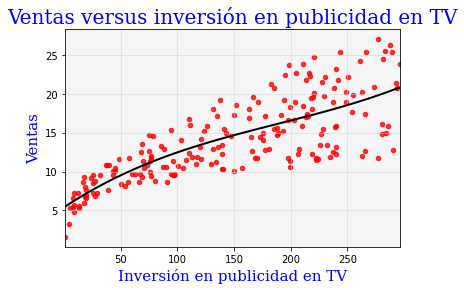

In [56]:
fig = sns.regplot(x="TV",y="sales",data=Advertising,order=3,marker="o",
                  scatter_kws={"s":20,"color":"red"},line_kws={"ls":"solid","lw":2,"color":"black"},ci=None)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"blue","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"blue","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"blue","size":20},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
fig.patch.set_facecolor("whitesmoke")
plt.show(fig)

In [57]:
# Crear categorías a partir de los cuantiles
cats = 3  # Nro de categorías a crear
bins = Advertising["radio"].quantile(np.arange(0,cats+1)/cats) 
Advertising["radioC"] = pd.cut(Advertising["radio"],bins,labels=["Baja","Media","Alta"])

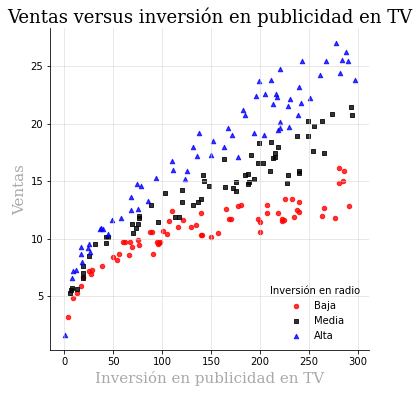

In [58]:
fig = sns.lmplot(x="TV",y="sales",data=Advertising,order=3,hue="radioC",markers=["o","s","^"],
                 palette=dict(Baja="red",Media="black",Alta="blue"),
                 scatter_kws={"s":20},ci=None,legend=False,fit_reg=False,
                 line_kws={"ls":"solid","lw":2})

plt.legend(loc='lower right',title="Inversión en radio",frameon=False,ncol=1)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"black","size":18},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)


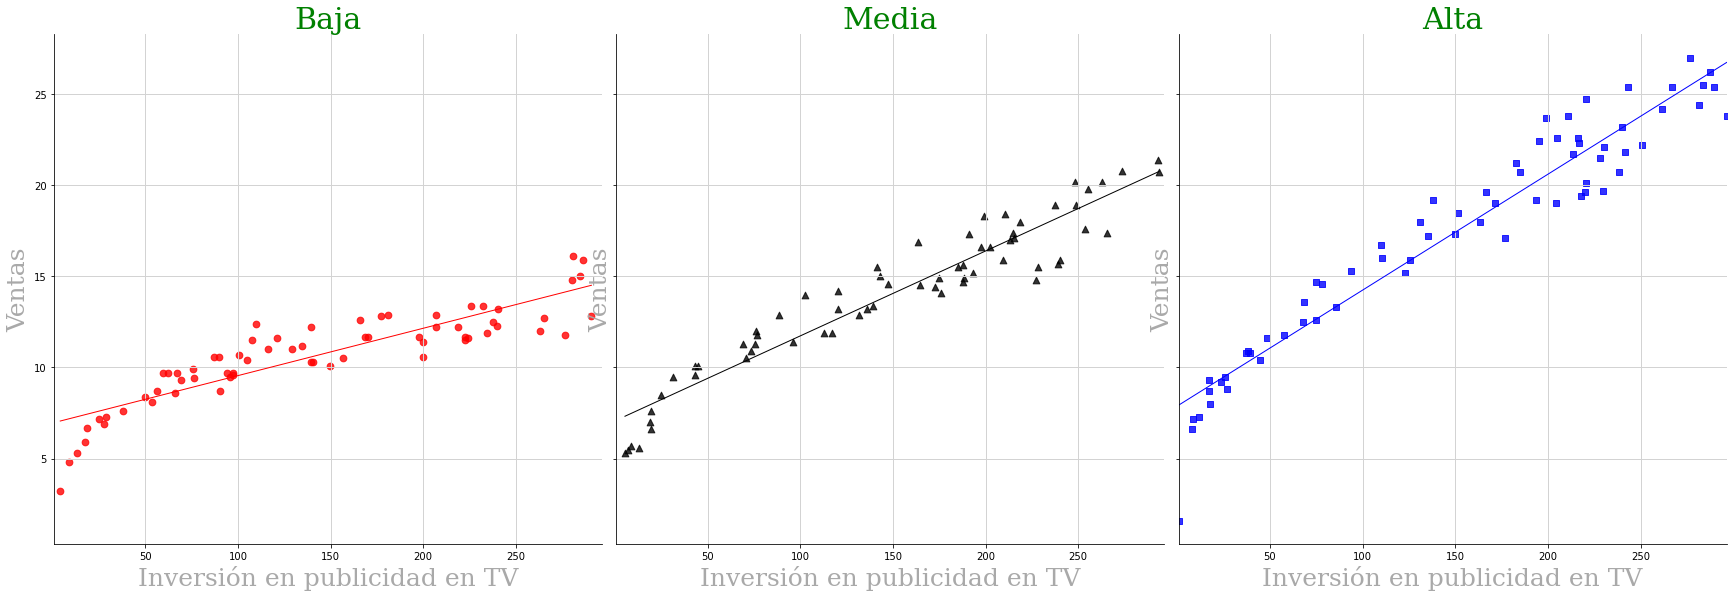

In [59]:
g = sns.FacetGrid(data=Advertising,col="radioC",hue="radioC",sharey=True,height=8,
                  hue_kws=dict(marker=["o","^","s"],color=["red","black","blue"]))
g.map(sns.regplot,"TV","sales",order=1,scatter_kws={"s":45},line_kws={"ls":"solid","lw":1},ci=None,fit_reg=True)
axes = g.axes.flatten()
titulos = ["Baja","Media","Alta"]
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

In [60]:
cats = 3
bins = Advertising["TV"].quantile(np.arange(0,cats+1)/cats) 
Advertising["TVC"] = pd.cut(Advertising["TV"],bins,labels=["Baja","Media","Alta"])

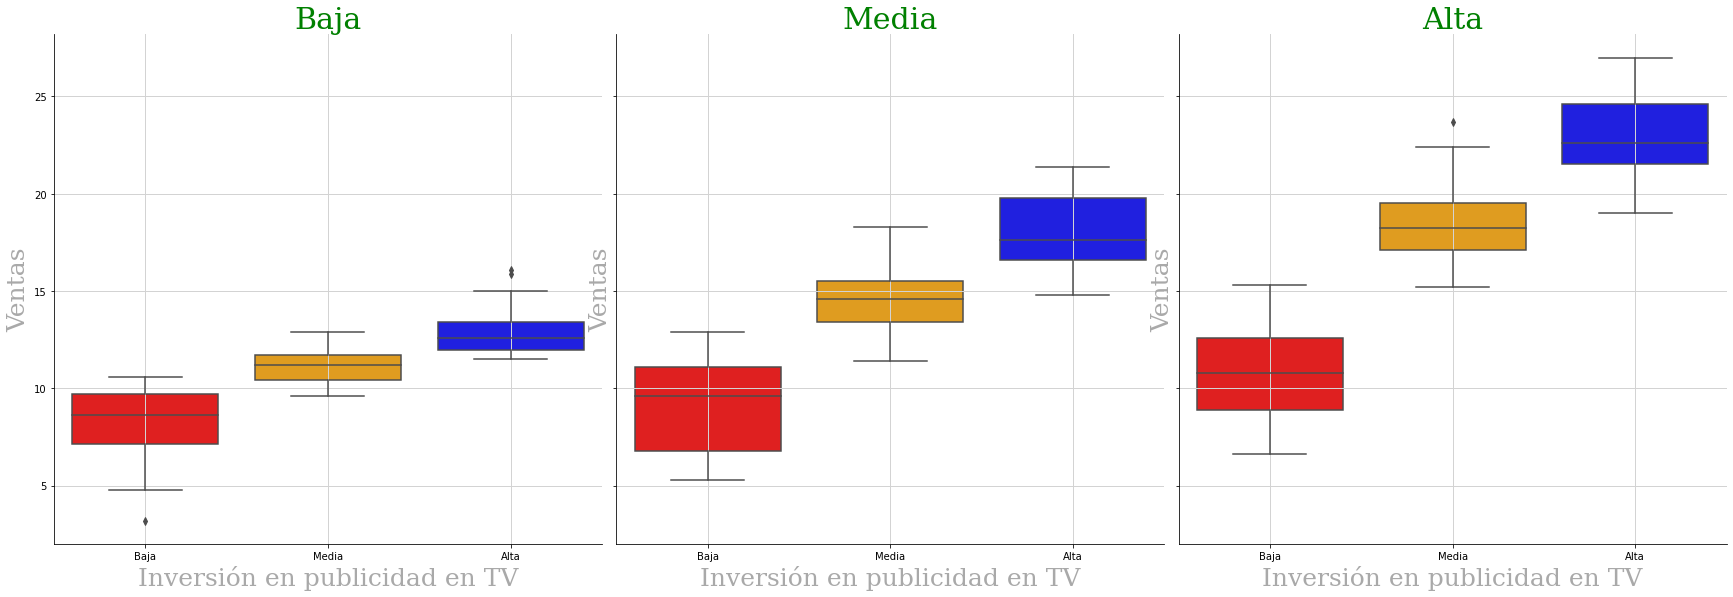

In [61]:
g = sns.FacetGrid(data=Advertising,col="radioC",sharey=True,height=8)
g.map(sns.boxplot,"TVC","sales",order=titulos,palette=dict(Baja="red",Media="orange",Alta="blue"),linewidth=1.5)
axes = g.axes.flatten()
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

/home/daniel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daniel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daniel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

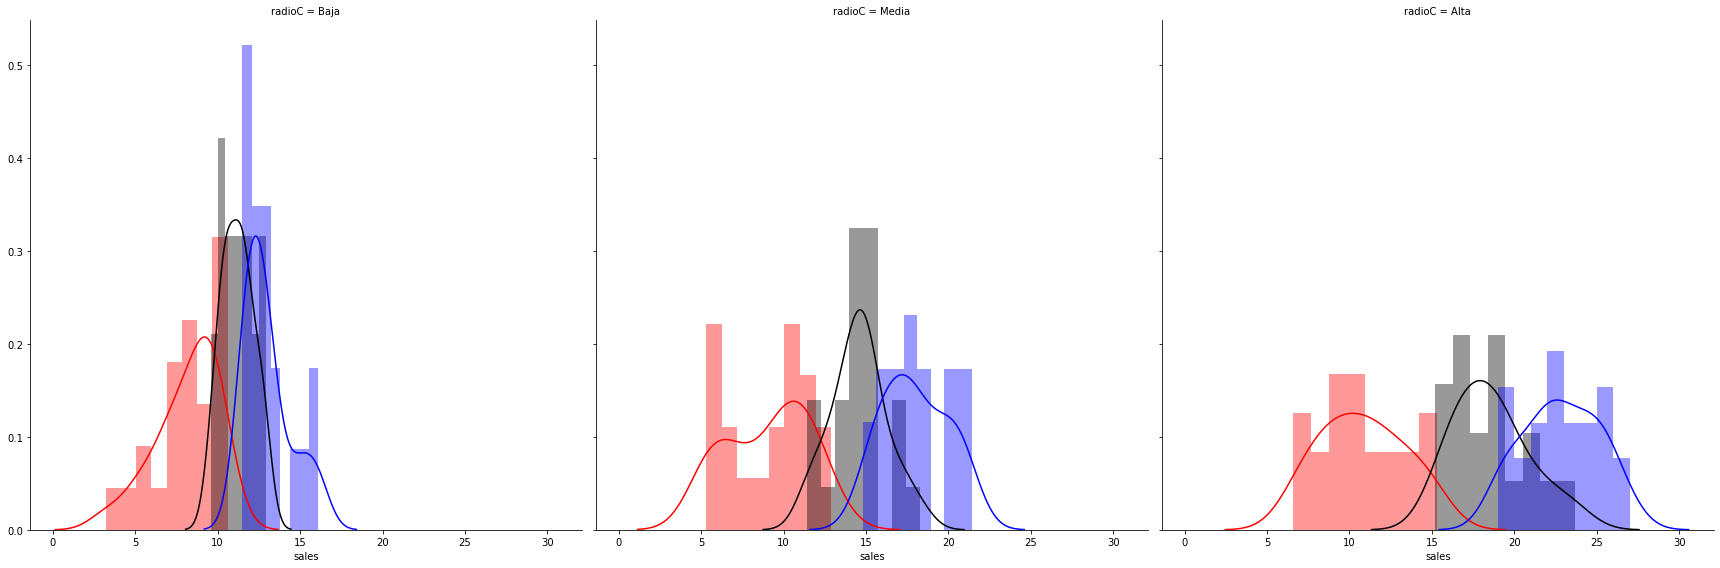

In [62]:
g = sns.FacetGrid(data=Advertising,col="radioC",hue="TVC",sharey=True,height=8,
                 hue_kws=dict(color=["red","black","blue"]))
g.map(sns.distplot,"sales",norm_hist=True,kde=True,bins=8)
for ax in np.arange(0,len(titulos)):
    #axes[ax].set_xlabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

In [63]:
#sns.get_dataset_names()
cars = sns.load_dataset("mpg")
cars.loc[cars["origin"]=="usa","Origen"] = "Estados Unidos"
cars.loc[cars["origin"]!="usa","Origen"] = "Japón y Europa"

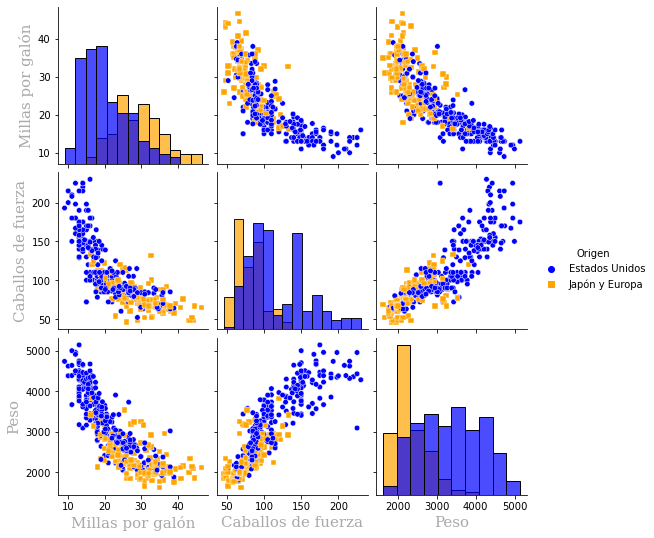

In [64]:
fig = sns.pairplot(cars, vars=["mpg","horsepower","weight"],hue="Origen",kind="scatter",
                   diag_kind="hist",palette=["blue","orange"],
                   markers=["o", "s"],plot_kws={"s":30},diag_kws={"alpha":0.7,} )

axes = fig.axes.flatten()
titulos = ["Millas por galón","Caballos de fuerza","Peso"]
c = np.sqrt(len(axes))
for ax1 in np.arange(0,c):
    for ax2 in np.arange(0,c):
        ax = int(ax1*c + ax2)
        if ax2 == 0: axes[ax].set_ylabel(titulos[int(ax1)],fontdict={"family":"serif","color":"darkgrey","size":15})
        if ax1 == c-1: axes[ax].set_xlabel(titulos[int(ax2)],fontdict={"family":"serif","color":"darkgrey","size":15})
plt.show(fig)

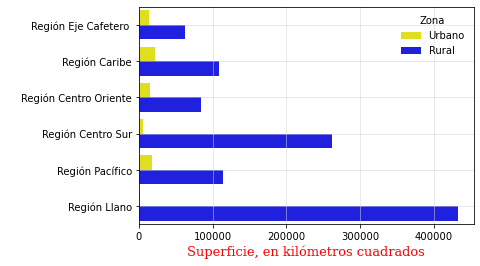

In [65]:
fig=sns.barplot(y="Region",x="Superficie",hue="Zona",data=Municipios,estimator=sum,ci=None,
                palette=dict(Rural="blue",Urbano="yellow"))
plt.xlabel("Superficie, en kilómetros cuadrados",fontdict={"family":"serif","color":"red","size":13})
plt.ylabel(" ")
plt.legend(loc='upper right',title="Zona",frameon=False,ncol=1)
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

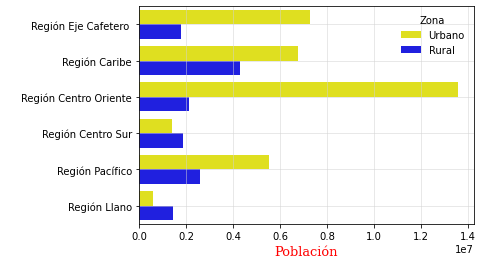

In [66]:
fig=sns.barplot(y="Region",x="Poblacion",hue="Zona",data=Municipios,estimator=sum,ci=None,
                palette=dict(Rural="blue",Urbano="yellow"))
plt.xlabel("Población",fontdict={"family":"serif","color":"red","size":13})
plt.ylabel(" ")
plt.legend(loc='upper right',title="Zona",frameon=False,ncol=1)
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)